In [1]:
# Import library
import pandas as pd

In [2]:
# Load dataset
df= pd.read_csv('../../dnyan/Datasets/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# create independent & dependent variable
X=df[['Age', 'EstimatedSalary']] # Independent Variables
y = df['Purchased']   # dependent variable 

In [5]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state= 46)

In [9]:
print(X_train.head(),'\n' ,X_test.head())

     Age  EstimatedSalary
11    26            52000
103   33           149000
96    35            25000
219   59           143000
303   37            79000 
      Age  EstimatedSalary
342   38            65000
153   36            50000
81    39            42000
125   39            61000
314   39            79000


In [10]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)  # min max => train data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.svm import SVC
model_1 = SVC(kernel = 'linear')
model_1.fit(X_train_scaled,y_train)
model_1.score(X_test_scaled,y_test)

0.82

In [13]:
model_2 = SVC(kernel = 'poly')
model_2.fit(X_train_scaled,y_train)
model_2.score(X_test_scaled,y_test)

0.91

In [14]:
model_3 = SVC(kernel = 'rbf')
model_3.fit(X_train_scaled,y_train)
model_3.score(X_test_scaled,y_test)

0.92

In [15]:
q = [[20,21000],
     [45,90000],
     [62,30000]]
model_1.predict(q)

array([1, 1, 1], dtype=int64)

In [16]:
Q=scaler.transform(q)

In [17]:
Q

array([[0.04761905, 0.04444444],
       [0.64285714, 0.55555556],
       [1.04761905, 0.11111111]])

In [18]:
model_1.predict(Q)

array([0, 1, 1], dtype=int64)

In [19]:
model_2.predict(Q)

array([0, 0, 1], dtype=int64)

In [20]:
model_3.predict(Q)

array([0, 1, 1], dtype=int64)

In [21]:
# Generate data for finding out decision boundry

import numpy as np

In [22]:
A = np.arange(0,1,0.01)
A

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [23]:
D = []
for i in A:
    for j in A:
        D.append([i,j])
D = np.array(D)

In [24]:
D.shape

(10000, 2)

In [25]:
import matplotlib.pyplot as plt

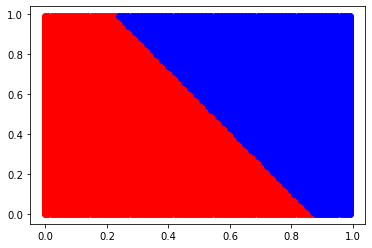

In [26]:
y_pre = model_1.predict(D)   # Linear Kernel
class_0 = D[y_pre==0]
class_1 = D[y_pre==1]
plt.scatter(class_0[:,0],class_0[:,1],c='red')
plt.scatter(class_1[:,0],class_1[:,1],c='blue')

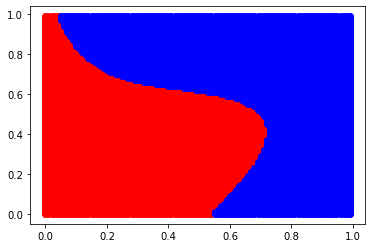

In [27]:
y_pre = model_2.predict(D)   # Poly Kernel
class_0 = D[y_pre==0]
class_1 = D[y_pre==1]
plt.scatter(class_0[:,0],class_0[:,1],c='red')
plt.scatter(class_1[:,0],class_1[:,1],c='blue')

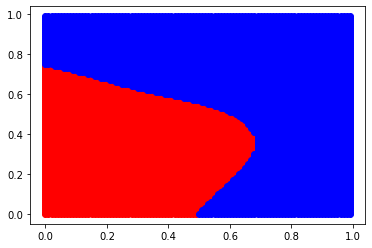

In [28]:
y_pre = model_3.predict(D)   # RBF Kernel
class_0 = D[y_pre==0]
class_1 = D[y_pre==1]
plt.scatter(class_0[:,0],class_0[:,1],c='red')
plt.scatter(class_1[:,0],class_1[:,1],c='blue')

In [29]:
scaler.inverse_transform([[1.2,0]])

array([[   68.4, 15000. ]])